 ## Answer
Category of Passengers most likely to survive
 * Female passengers who were travelling in 1st class between age 31-40 years with family have more chances of survival also passengers below 10 in 1st class have better chanves of survival.


Detail explaination of logic of analysis:
* Females in 1st class have 98% chance of survival and passengers below 10 years also have 67% chances of survival while male in 1st class have 36% chance.
* In second class female survival percentage was 91% which was less then those of passengers below 10 who have 100% survival and male only have 8% survival.
* In 3rd class there was approximately equal chances of percentage of survival between passenger below 10 and females which was between 45% to 50% and for male it was 12 %.
* From the Figure 2 above it can be conclude that female passengers traveling in 1st class have greater chances of survival. 
* From the Figure 4 we can conclude that passengers traveling with family have approximately 50% chances or death or survival   while passengers traveling alone have less chances of survival.
* 61% of passengers below 10 year survived.
* 75% of female survived
* 17% of male survived
* In figure 5 we can see that count for female passengers survived is more then those who could not survive and similar goes for passengers below 10 years.
* From figure 6 it can be conclude that female passengers who were 31 to 40 years have high chance of survival, similarly male of 31-40 have high chance of survival.

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.
## Answer
* Survived: This was the main attribute which was used for this study to know about the status of passenger(0-dead,1-alive)

* Sex: Sex seems like the most powerful variable in deciding the survival rate as we saw from the analysis above.But in this analysis I engineered new variable from age and sex, which was named as person. Person also containes male and females but there was a new category added 'below 10' for passengers who were below 10 years of age.

* Age: Age attribute also playes a significant role in this analysis but we have created new attribute with age in groups which was named as age_group.

* Pclass: In this study I used passenger class as it can be the factor which affects the survival rate in this analysis. I firstly used Pclass to groupby the sex with survived and used the mean and count from which we got the percentage of survivors in each class and sex. Then I used a countplot to visualise Pclass and Person(Male, Female,Below_10) survived count. 

* Parch: Firstly, I used this in age analysis to derive the age for missing values. Then I used Parch and Sibsb to derive a new attribute form which we can see whether person is travelling alone or in family.

* Person: This was derived form sex and age to change the value for age below 10 years to new value of Below_10. This was used in groupby with survived to get the percentage of people survived accroding to sex. Also used to do a catplot showing age group with male female and below_10 passengers.

* Age group: Insted of using age I used age_group because it can be used to analise for a range of date and make analysis easy. it is used to analyse the maximum survival in differennt age groups.

* Accompanied: this was derived from Parch and Sibsp. This attribute was used to define whether a person is travelling alone or with family. Then this attribute was used to  analyse the survival rate of passengers travelling alone vs traveling with family.


**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.
## Answer

* Person: This was derived form sex and age to change the value for age below 10 years to new value of Below_10. This was used in groupby with survived to get the percentage of people survived accroding to sex. Also used to do a catplot showing age group with male female and below_10 passengers.

* Age group: Insted of using age I used age_group because it can be used to analise for a range of date and make analysis easy. it is used to analyse the maximum survival in differennt age groups.

* Accompanied: this was derived from Parch and Sibsp. This attribute was used to define whether a person is travelling alone or with family. Then this attribute was used to  analyse the survival rate of passengers travelling alone vs traveling with family.

### Excluded attributes

I dropped Cabin,Embarked, PassengerId, Name,Fare,Ticket,Age,Sex.

* I dropped Embarked and Cabin columns as my reason for dropping the Embarked and Cabin Attribute were that there were so many empty values in Cabin attribute that if I will replace them with any other vales then the data will not remain generic.Also for my analysis it Cabin and Embarked were considered independent variables which will not have any effect on the analysis.

* PassengerId is already a independent variable as from it we can not predict who survised or who not.Smilarly for name also it can not help in analysis for Survival.

* Fare and Ticked will define the passenger class so used passenger class directly and dropped thse two.

* Age and Sex were dropped because we engineered new attributes. which will take care of both of these attributes.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.
 ## Answer
 
In the provided data set the missing values were form Age,Cabin and Embarked attribtes.
 
* So Firstly, I used Passenger class to find the mean age for each class. I could replace the mean value with na NaN values but I only get three values which were to be replaced with 177 missing values.

* Then i used sex to find the mean age of male and female,and Lastly I used Parch atrribute, here i get varieties of values  which I find suitable to be replaced with missing values so as to have more distributed age.

* After getting the mean for a Age at different values of Age used Transform to replace the values. 



## 1. Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
df_main=pd.read_csv('train.csv',index_col=None)


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Explaination**
* First I want to check for the missing data. As we see here we have missing data in age column, cabin column and embarked column.I have to either drop these columns or predict the values for these places.

In [4]:
df_main.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Missing data analysis

In [5]:
total = df_main.isnull().sum().sort_values(ascending=False)
percent_1 = df_main.isnull().mean()*100
percent_2 = (round(percent_1,1)).sort_values(ascending= False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


*As the percentage of missing value is more then 10% we can not drop these values.But in case there are large number of values missing then we should also drop the values, if in case we find the values are independent variables and will not affect the result then we can drop them too.*

In [6]:
df=df_main.drop(columns=['Cabin','PassengerId','Name','Fare','Ticket','Embarked'],axis=1)
# I can drop Cabin, PassengerId, Name, Fare and Ticket columns as these columns data is not deciding the chances of survival.
# I also saved a new list for analysis.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


##  2.1. Filling missing data

In [8]:
Age_analysis_1 = df_main.groupby('Pclass')['Age'].agg(['count','mean']).round(1).reset_index()
Age_analysis_1

,Pclass,count,mean
0,1,186,38.2
1,2,173,29.9
2,3,355,25.1


In [9]:
Age_analysis_2 = df_main.groupby('Sex')['Age'].agg(['count','mean']).round(1).reset_index()
Age_analysis_2

,Sex,count,mean
0,female,261,27.9
1,male,453,30.7


In [10]:
Age_analysis_3 = df_main.groupby('Parch')['Age'].agg(['count','mean']).round(1).reset_index()
Age_analysis_3

,Parch,count,mean
0,0,521,32.2
1,1,110,24.4
2,2,68,17.2
3,3,5,33.2
4,4,4,44.5
5,5,5,39.2
6,6,1,43.0


* We can use any of the above analysis to fill the age data but I am using age_analysis_3 as with that analysis I will have more values to compare and fill the data.

In [34]:
df.loc[df.Age.isnull(),'Age']=df.groupby('Parch').Age.transform('mean').round(1)
# Filling the data of missed values

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

##  3. Survival Analysis

Creating new Column where we will have 3 category  i.e Male,Female and below 10 year old passenger.

In [14]:
def young_passenger(passenger):
    age,sex=passenger
    if age<10:
        return 'Below_10'
    else:
        return sex
    

In [15]:
df['Person']=df[['Age','Sex']].apply(young_passenger,axis=1)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Person
0,0,3,male,22.0,1,0,male
1,1,1,female,38.0,1,0,female
2,1,3,female,26.0,0,0,female
3,1,1,female,35.0,1,0,female
4,0,3,male,35.0,0,0,male
5,0,3,male,32.2,0,0,male
6,0,1,male,54.0,0,0,male
7,0,3,male,2.0,3,1,Below_10
8,1,3,female,27.0,0,2,female
9,1,2,female,14.0,1,0,female


In [16]:
# Creating Bins for age data

bins = [0,10,20,30,40,50,60,70,80,90]
bin_labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','>80']
df['Age_group'] = pd.cut(df.Age,bins,right=False,labels = bin_labels)


In [55]:
df_Titanic=df.drop(['Sex','Age'],axis=1)

* I am dropped the age and sex as now I can use Age_group column to verify data for a group

In [56]:
df_Titanic.head()

,Survived,Pclass,SibSp,Parch,Person,Age_group
0,0,3,1,0,male,21-30
1,1,1,1,0,female,31-40
2,1,3,0,0,female,21-30
3,1,1,1,0,female,31-40
4,0,3,0,0,male,31-40


<AxesSubplot:title={'center':'Figure_1: Shows number of people survived vs not survived'}, xlabel='Survived', ylabel='count'>

Percentage of people survived is 38 %


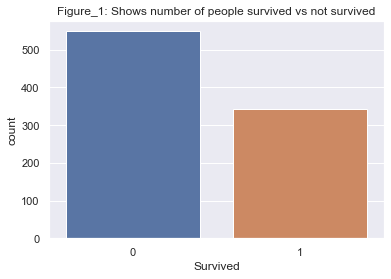

In [57]:
plt.title('Figure_1: Shows number of people survived vs not survived')
display(sns.countplot(x='Survived',data=df))

# Finding the percentage of people survived.

df_Survived=df_Titanic[(df_Titanic['Survived'] == 1)]

# I created a separate data set with the data of only people that survived.

No_of_Survived=df_Survived.count().mean()
Total_number=df_Titanic.count().mean()
perc=round((No_of_Survived/Total_number)*100)
print('Percentage of people survived is',perc,'%')

In [58]:
Survival_analysis_Class = df_Titanic.groupby(['Pclass','Person'])['Survived'].agg(['count','mean']).round(2)
Survival_analysis_Class

count  mean
Pclass Person               
1      Below_10      3  0.67
       female       93  0.98
       male        120  0.36
2      Below_10     17  1.00
       female       68  0.91
       male         99  0.08
3      Below_10     42  0.45
       female      123  0.50
       male        326  0.12

From above table by compairing Passenger class,Sex and survived column, from the mean it shows 
* Females in 1st class have 98% chance of survival and passengers below 10 years also have 67% chances of survival while men in 1st class have 36% chance.
* In second class female survival percentage was 91% which was less then those of passengers below 10 who have 100% survival and male only have 8% survival.
* In 3rd class there was approximately equal chances of percentage of survival between passenger below 10 and females which was between 45% to 50% and for male it was 12 %.

#### So first analysis is that people from 1st class have high chance of survival. But we can narrow this down like shown below.

<AxesSubplot:title={'center':'Figure_2: Shows Category of people who survived in different passenger class'}, xlabel='Pclass', ylabel='count'>

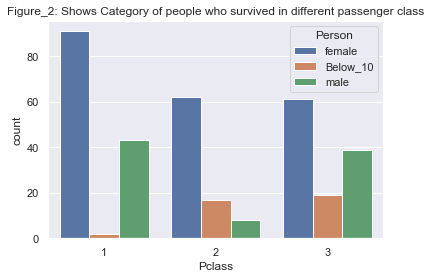

In [59]:
# Grouping Passenger class and sex to determin either male, female or infant from different class have high chances of survival.


plt.title('Figure_2: Shows Category of people who survived in different passenger class')
sns.countplot(x='Pclass',hue='Person',data=df_Survived)


* From the figure above it is clear the female from all three class have more chances of survival then male.
* Females from 1st class have more chances of survival.
* Male from 1 st class have more chance of survival then in any other class.

### Traveling alone or in family Factor

In [60]:
df_Titanic['Accompanied']=df_Titanic.SibSp + df_Titanic.Parch
df_Titanic['Accompanied']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Accompanied, Length: 891, dtype: int64

In [25]:
df_Titanic['Accompanied'].loc[df_Titanic.Accompanied>0]='With Family'
df_Titanic['Accompanied'].loc[df_Titanic.Accompanied==0]='Without Family'

C:\Users\ayush\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [61]:
df_Titanic.head()

,Survived,Pclass,SibSp,Parch,Person,Age_group,Accompanied
0,0,3,1,0,male,21-30,1
1,1,1,1,0,female,31-40,1
2,1,3,0,0,female,21-30,0
3,1,1,1,0,female,31-40,1
4,0,3,0,0,male,31-40,0


<AxesSubplot:title={'center':'Figure_3: Shows people who were travelling with family vs alone'}, xlabel='Accompanied', ylabel='count'>

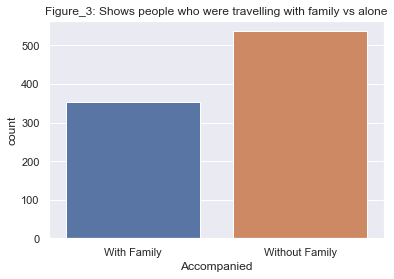

In [27]:
plt.title('Figure_3: Shows people who were travelling with family vs alone')
sns.countplot(x='Accompanied',data=df_Titanic)

Text(0.5, 1.0, 'Figure_4: Shows the count of survival and dead who were with family and alone')

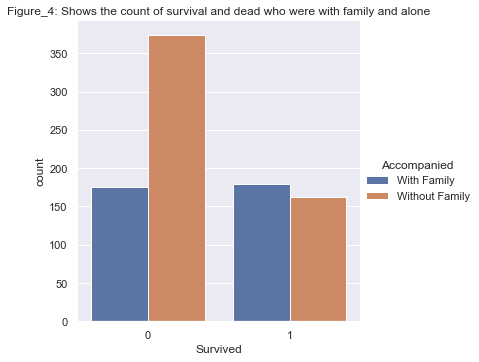

In [28]:
sns.catplot(x='Survived',hue='Accompanied',data=df_Titanic,kind='count')
plt.title('Figure_4: Shows the count of survival and dead who were with family and alone')

### Seems like while travelling with family there were more chances of survival

In [49]:
Survival_analysis_Sex = df_Titanic.groupby('Person')['Survived'].agg(['count','mean']).round(2).reset_index()
Survival_analysis_Sex

,Person,count,mean
0,Below_10,62,0.61
1,female,284,0.75
2,male,545,0.17


From the operation above we can say that:
* 61% of passengers below 10 years survived
* 75% of female survived
* 17% of male survived

Text(0.5, 1.0, 'Figure_5: Shows the survival and death count of different category of passenger')

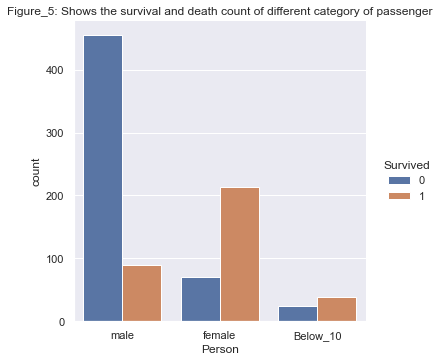

In [32]:
display(sns.catplot(x='Person',hue='Survived',data=df_Titanic,kind='count'))
plt.title('Figure_5: Shows the survival and death count of different category of passenger')

0                                              
Age_group 0-10 11-20 21-30 31-40 41-50 51-60 61-70 71-80 >80
Person                                                      
Below_10    38     0     0     0     0     0     0     0   0
female       0    35    54    83    22    16     4     0   0
male         0     7    27    37    12     4     2     0   1

Text(0.5, 1.0, 'Figure_6: Shows the age group of different type of passenger')

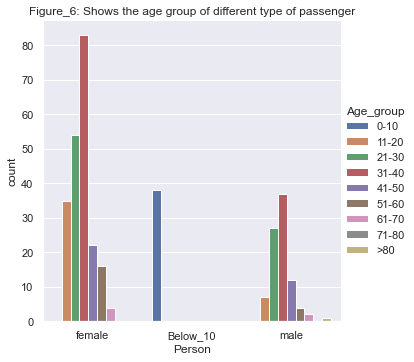

In [33]:
# Grouping Passenger age group and sex to determin which age group have high chances of survival.

grouped_by_Survived = df_Survived.groupby(['Person','Age_group'])
display(grouped_by_Survived.size().to_frame().unstack())

# Ploting the results for better understanding.

display(sns.catplot(x='Person',hue='Age_group',data=df_Survived,kind='count'))
plt.title('Figure_6: Shows the age group of different type of passenger')



* Female between age 31-40 year survided more then any other age group.
* Male between age group 31-40 year survided more then any other age group.
* Both Females and passengers below 10 have high chances of survival
